In [15]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
filepath = '../SavedData/simulated_transaction_2024.csv'
data = pd.read_csv(filepath) 

## High Spenders

In [17]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['YearMonth'] = data['Date'].dt.to_period('M')

monthly_spending = data[data['Amount'] < 0].groupby(['Account No', 'YearMonth'])['Amount'].sum().abs()
high_spenders = monthly_spending[monthly_spending > 2000].reset_index()

high_spenders

,Account No,YearMonth,Amount
0,101531259.0,2023-01,2241.03
1,104832000.0,2023-01,3780.83
2,104832000.0,2023-02,2444.87
3,104832000.0,2023-03,2152.51
4,104832000.0,2023-04,2178.26
...,...,...,...
3546,999752672.0,2023-07,2117.39
3547,999752672.0,2023-08,2445.99
3548,999752672.0,2023-09,2629.67
3549,999752672.0,2023-10,2139.63


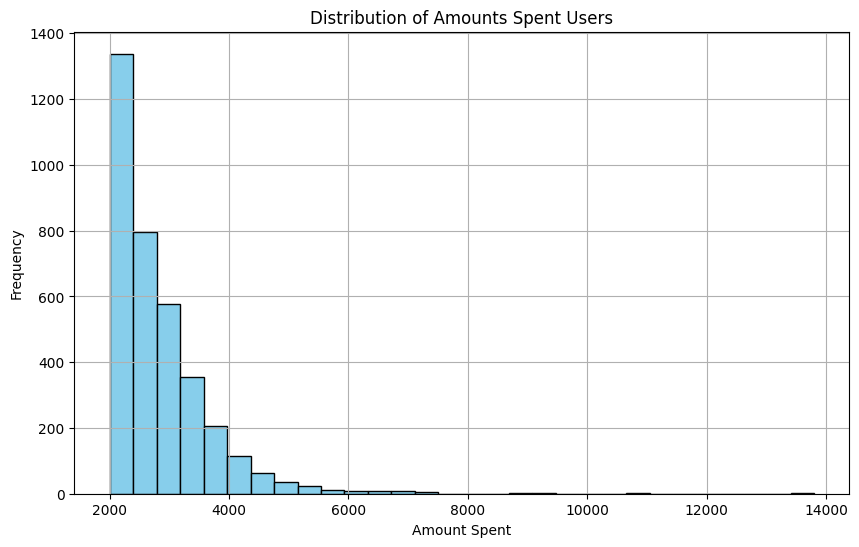

In [18]:
# histogram of the amounts spent
plt.figure(figsize=(10, 6))
plt.hist(high_spenders['Amount'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Amounts Spent Users')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


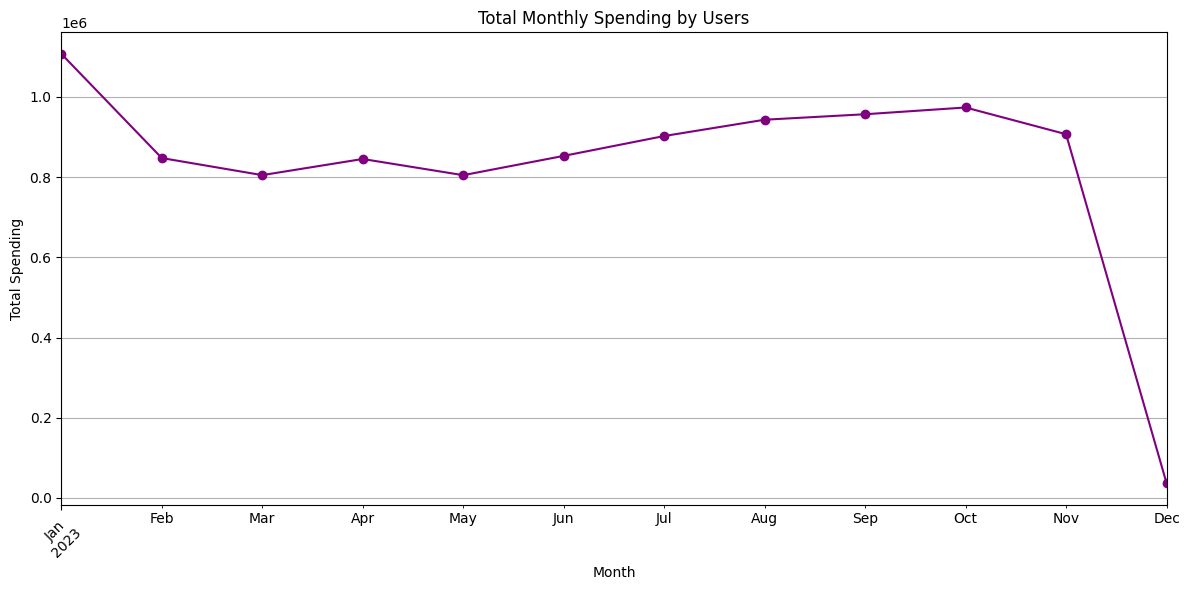

In [19]:
# Time series 
monthly_totals = high_spenders.groupby('YearMonth')['Amount'].sum()
plt.figure(figsize=(12, 6))
monthly_totals.plot(kind='line', marker='o', color='purple')
plt.title('Total Monthly Spending by Users')
plt.xlabel('Month')
plt.ylabel('Total Spending')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Cafe Visits

In [20]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', errors='coerce')

cafe_keywords = ['cafe', 'coffee', 'starbucks']
cafe_transactions = data[data['Third Party Name'].str.contains('|'.join(cafe_keywords), case=False, na=False)]

cafe_visit_counts = cafe_transactions['Account No'].value_counts().reset_index()
cafe_visit_counts.columns = ['Account No', 'Frequency']

cafe_visit_counts = cafe_visit_counts.sort_values(by='Frequency', ascending=False)

cafe_visit_counts

,Account No,Frequency
0,540159353.0,235
1,688712152.0,228
2,117273481.0,221
3,506618547.0,186
4,885259672.0,185
...,...,...
178,532525712.0,1
177,424397946.0,1
176,455052690.0,1
175,405945930.0,1


## Shopping

In [21]:
apparel_keywords = ['clothes', 'apparel', 'boutique', 'fashion','fat face', 'north face'  ]
apparel_transactions = data[data['Third Party Name'].str.contains('|'.join(apparel_keywords), case=False, na=False)]

apparel_visit_counts = apparel_transactions['Account No'].value_counts().reset_index()
apparel_visit_counts.columns = ['Account No', 'Frequency']

apparel_visit_counts = apparel_visit_counts.sort_values(by='Frequency', ascending=False)

apparel_visit_counts

,Account No,Frequency
0,749378808.0,53
2,407574996.0,50
1,203466392.0,50
3,176922958.0,46
4,454356905.0,43
...,...,...
761,656781737.0,1
760,282046994.0,1
759,857997794.0,1
757,254018059.0,1


## ISA's

In [22]:
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by='Date', inplace=True)

data = data[data['Date'].dt.year == 2023]

initial_balances = data.groupby('Account No').first()['Balance']
final_balances = data.groupby('Account No').last()['Balance']

balance_change = final_balances - initial_balances

#salary as the average of positive transaction amounts
monthly_salaries = data[data['Amount'] > 0].groupby('Account No')['Amount'].mean()

#criteria for eligibility
good_salary = monthly_salaries >= 3000
sufficient_balance_increase = balance_change >= 1600

eligible_accounts = monthly_salaries[(good_salary & sufficient_balance_increase)].index

recommended_accounts = data[data['Account No'].isin(eligible_accounts)]
recommended_accounts = recommended_accounts[['Account No', 'Balance', 'Amount']].drop_duplicates()


recommended_accounts


,Account No,Balance,Amount
3782,730002588.0,-193.980000,-18.99
3781,730002588.0,-174.990000,-15.99
3799,558119802.0,-297.990000,-15.99
3800,558119802.0,-305.980000,-7.99
3926,930277104.0,1127.010000,-18.99
...,...,...,...
230257,639409800.0,40441.725867,-9.20
230256,613729471.0,9687.858016,-3.69
230245,659415300.0,2629.507146,-60.99
230239,874431242.0,11359.810306,-24.34


In [23]:
positive_transactions = data[(data['Balance'] > 0) & (data['Amount'] > 0)]

positive_transactions_details = positive_transactions[['Account No', 'Balance', 'Amount']].drop_duplicates()

positive_transactions_details

,Account No,Balance,Amount
0,678330503.0,2971.000000,1584.00
243,762896656.0,2062.000000,720.00
241,197865285.0,3913.000000,2870.00
240,816685391.0,2899.000000,1675.00
239,938992364.0,2654.000000,670.00
...,...,...,...
222459,146686559.0,865.368589,1675.00
222446,180616589.0,2496.618828,1733.00
222463,355940285.0,11189.705978,3333.33
228822,336171116.0,428.428400,380.00


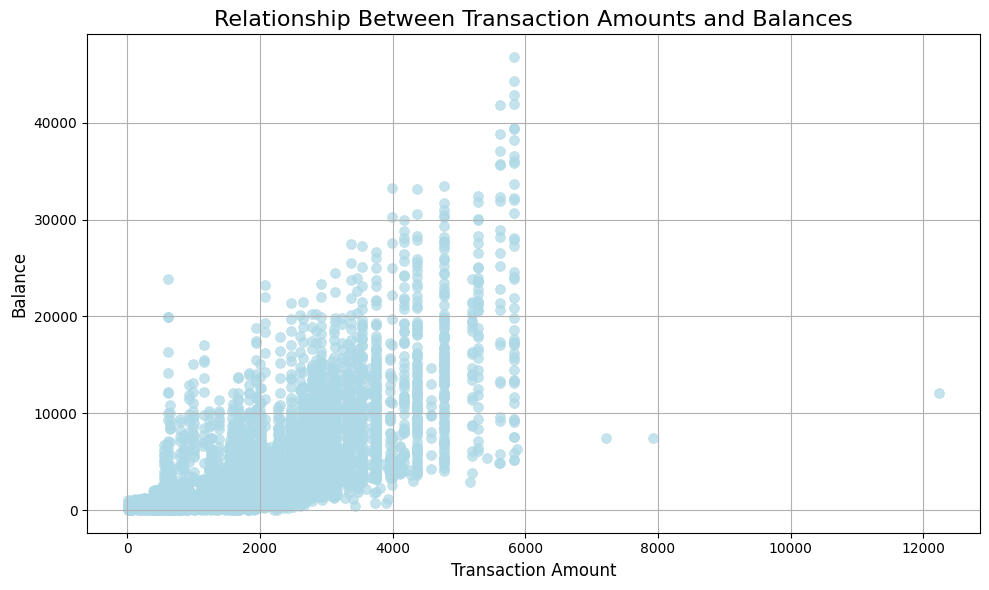

In [24]:
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by='Date', inplace=True)

positive_transactions = data[(data['Balance'] > 0) & (data['Amount'] > 0)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Amount', y='Balance', data=positive_transactions, color='lightblue', edgecolor=None, s=50, alpha=0.7)

plt.title('Relationship Between Transaction Amounts and Balances', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Balance', fontsize=12)
plt.grid(True)  

plt.legend([],[], frameon=False)

plt.tight_layout() 
plt.show()


In [25]:
#only balances
if 'Account No' in data.columns:
    data.sort_values(by=['Account No', 'Date'], inplace=True)
else:
    data.reset_index(inplace=True)
    data.sort_values(by=['Account No', 'Date'], inplace=True)

final_balances = data.groupby('Account No').last()

positive_balance_accounts = final_balances[final_balances['Balance'] > 0]

positive_balance_accounts_details = positive_balance_accounts[['Balance']]

positive_balance_accounts_details

,Balance
Account No,
101531259.0,227.972100
105375973.0,509.309653
106601471.0,11920.401863
108481285.0,10704.071830
108563213.0,26334.354972
...,...
994947671.0,1682.755700
995615876.0,2331.762862
996042490.0,7222.008082


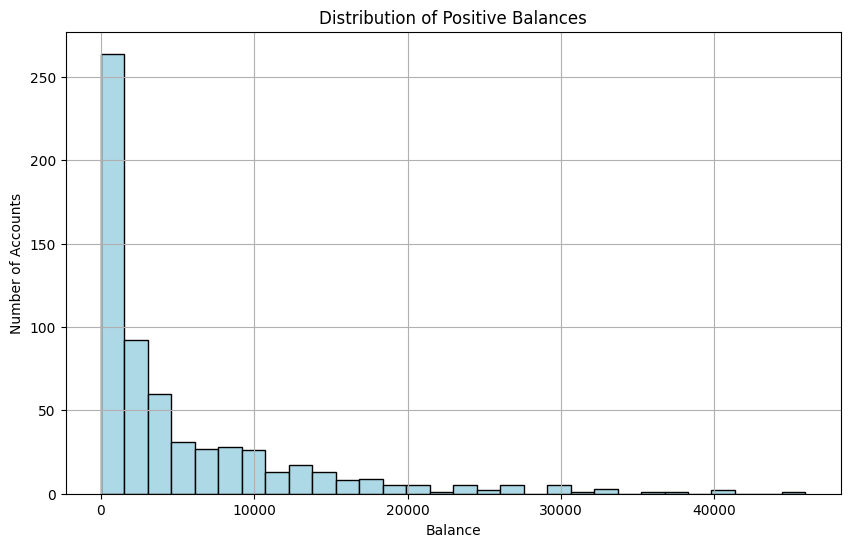

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(positive_balance_accounts_details['Balance'], bins=30, color='lightblue', edgecolor='black')
plt.title('Distribution of Positive Balances')
plt.xlabel('Balance')
plt.ylabel('Number of Accounts')
plt.grid(True)
plt.show()